<a href="https://colab.research.google.com/github/beercafeguy/PyMLLab/blob/master/ML_A_Z/classification/knn_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!ls -ltr /content/drive/MyDrive/ML_A_Z/Part_3_Classification/Section_15_K_Nearest_Neighbors_KNN/Python/Social_Network_Ads.csv

-rw------- 1 root root 4903 May  3  2020 /content/drive/MyDrive/ML_A_Z/Part_3_Classification/Section_15_K_Nearest_Neighbors_KNN/Python/Social_Network_Ads.csv


In [5]:
path = '/content/drive/MyDrive/ML_A_Z/Part_3_Classification/Section_15_K_Nearest_Neighbors_KNN/Python/Social_Network_Ads.csv'

In [6]:
df = pd.read_csv(path)

In [7]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [8]:
df.shape

(400, 3)

In [9]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=123)

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn_classifier.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [13]:
y_pred = knn_classifier.predict(X_test_scaled)

In [14]:
knn_classifier.score(X_test_scaled,y_test)

0.87

In [15]:
np.concatenate((y_test.reshape(len(y_pred),1),y_pred.reshape(len(y_pred),1)),1)

array([[0, 1],
       [0, 1],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 0],
       [1, 1],
       [0,

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[54,  9],
       [ 4, 33]])

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.87

<ipython-input-18-2cb374304d01>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


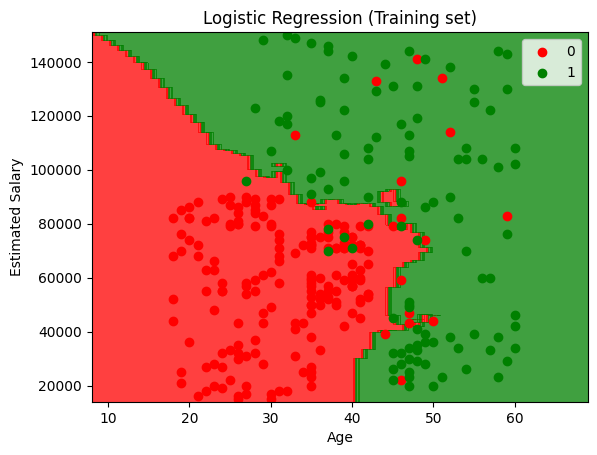

In [18]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train_scaled), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, knn_classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()